In [2]:
#import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as pt 
# load data 
dataset = load_dataset('csv', data_files='/Users/onurtemel/Downloads/data_jobs.csv')
df = dataset["train"].to_pandas()
# Data Clean up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Counts of Job titles

In [3]:
df.pivot_table(index = "job_title_short",aggfunc="size")

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
df.groupby("job_title_short")["salary_year_avg"].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

Text(0, 0.5, 'Job posting count')

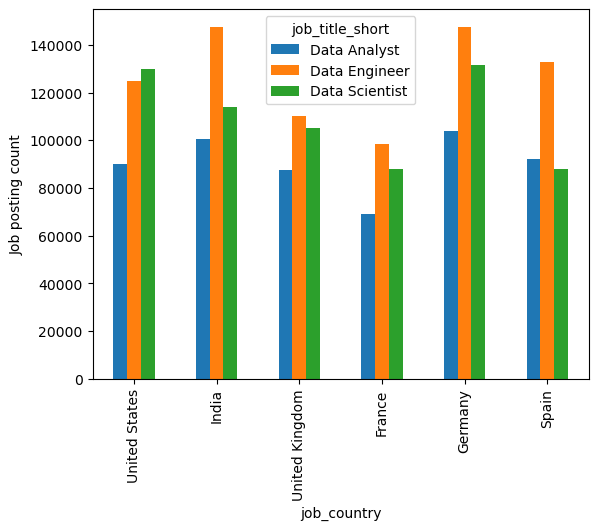

In [5]:
#find the countries with the most job posted
top_countries = df["job_country"].value_counts().head(6).index
df_job_country_salary = df.pivot_table(
    values = "salary_year_avg",
    index = "job_country",
    columns = "job_title_short",
    aggfunc = "median"

)
df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ["Data Analyst","Data Engineer","Data Scientist"]
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot.bar()
pt.ylabel("Job posting count")